In [1]:
import numpy as np
import shapely
from czml3 import Document, Packet, Preamble
from czml3.properties import Color, Material, Polygon, PositionList, SolidColorMaterial

from transforms84.geodetic_systems import WGS84
from transforms84.helpers import DDM2RRM, RRM2DDM
from transforms84.transforms import (
    AER2ENU,
    ENU2ECEF,
    ECEF2geodetic,
)

## Make a square

In [2]:
m_dist = 500.0

In [3]:
rrm_top_left = DDM2RRM(np.array([[34], [33], [0]], dtype=np.float64))

In [4]:
rrm_top_right = ECEF2geodetic(
    ENU2ECEF(
        rrm_top_left,
        AER2ENU(DDM2RRM(np.array([[90], [0], [m_dist]], dtype=np.float64))),
        WGS84.a,
        WGS84.b,
    ),
    WGS84.a,
    WGS84.b,
)

In [5]:
rrm_bottom_left = ECEF2geodetic(
    ENU2ECEF(
        rrm_top_left,
        AER2ENU(DDM2RRM(np.array([[180], [0], [m_dist]], dtype=np.float64))),
        WGS84.a,
        WGS84.b,
    ),
    WGS84.a,
    WGS84.b,
)

In [6]:
rrm_bottom_right = ECEF2geodetic(
    ENU2ECEF(
        rrm_bottom_left,
        AER2ENU(DDM2RRM(np.array([[90], [0], [m_dist]], dtype=np.float64))),
        WGS84.a,
        WGS84.b,
    ),
    WGS84.a,
    WGS84.b,
)

## Visualise

Shapely

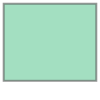

In [7]:
shapely.Polygon(
    [
        p[[1, 0]]
        for p in [rrm_top_left, rrm_top_right, rrm_bottom_right, rrm_bottom_left]
    ]
)

CZML

In [8]:
ddm_points = []
for p in [rrm_top_left, rrm_top_right, rrm_bottom_right, rrm_bottom_left]:
    ddm_points.extend(RRM2DDM(p[[1, 0, 2]]).ravel().tolist())
packets = [
    Preamble(name="simple"),
    Packet(
        id="polygon",
        polygon=Polygon(
            positions=PositionList(cartographicDegrees=ddm_points),
            material=Material(
                solidColor=SolidColorMaterial(color=Color(rgba=[255, 253, 55, 255]))
            ),
            outlineColor=Color(rgba=[255, 253, 55, 255]),
            outline=True,
        ),
    ),
]

In [9]:
with open("exmaple2.czml", "w") as f:
    f.write(Document(packets).dumps())